In [127]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


In [128]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier,plot_tree

iris = load_iris()

Plot Setosa and the Versicolor

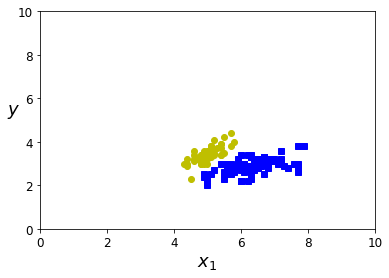

In [225]:
X = iris.data[:,(0,1)] # sepal length and width
y = iris.target

plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
plt.plot(X[:, 0][y!=0], X[:, 1][y!=0], "bs", label="Iris versicolor")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 10, 0, 10])
plt.show()

In [226]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(-1.3433397922944703, array([ 0.73474169, -0.63781099]))

In [227]:
X_new = [[5 , 3.5],[6,2.2]]
X_new_b = np.c_[np.ones((2, 1)), X_new]
lin_reg.predict(X_new)

array([0.09803018, 1.66192615])

init theta_best for predictions

In [228]:
X_b = np.c_[np.ones((150, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([-1.34333979,  0.73474169, -0.63781099])

In [230]:
X_new = np.array([[5 , 3.5], [6, 2.2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([0.09803018, 1.66192615])

------------------------------------------------------------------

In [174]:
X = iris["data"][:, :1]  # petal width
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris virginica, else 0

In [176]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)

LogisticRegression(random_state=42)

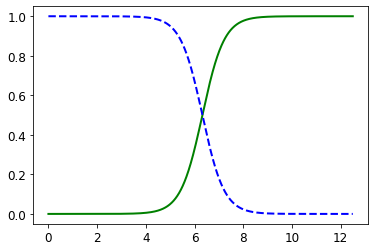

In [180]:
X_new = np.linspace(0,12.5, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")

/Users/peter/Library/Python/3.8/lib/python/site-packages/matplotlib/patches.py:1390: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  verts = np.dot(coords, M) + (x + dx, y + dy)


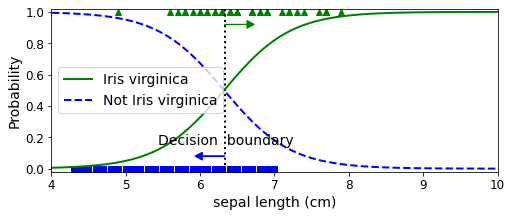

In [187]:
X_new = np.linspace(0, 12.5, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("sepal length (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([4, 10, -0.02, 1.02])
plt.show()

In [188]:
log_reg.predict([[6.6], [7.2]])

array([1, 1])

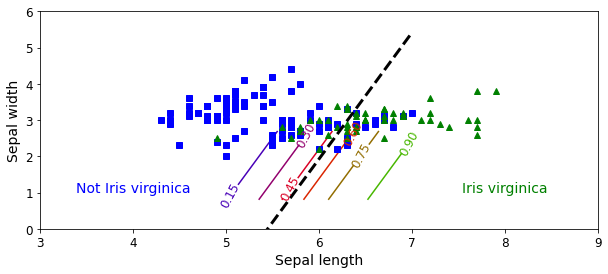

In [195]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (0, 1)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(4, 1, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(8, 1, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Sepal length", fontsize=14)
plt.ylabel("Sepal width", fontsize=14)
plt.axis([3, 9, 0, 6])
plt.show()

In [197]:
from sklearn.model_selection import KFold

def k_fold(X, y, k):
    kf = KFold(n_splits=k, shuffle=False)

    pred_values = []
    i = 0

    for train_index , test_index in kf.split(X):

        log_reg_k = LogisticRegression(solver="lbfgs", random_state=42)
        log_reg_k.fit(X, y)


        X_train , X_test = X[train_index,:],X[test_index,:]
        y_train , y_test = y[train_index], y[test_index]
        
        log_reg.fit(X_train,y_train)
        pred_values.append(log_reg.predict(X_test))

        i = i + 1

    return pred_values , y_test



In [211]:
def succcess_rate(arr):
    pred_values = arr[0]
    y_test = arr[1]
    succcess_rate = []
    
    for pred_values_ in pred_values:
        score = 0
        for i in range(len(pred_values_)-1):
            if(pred_values_[i] == y_test[i]):
                score = score + 1  
        succcess_rate.append(score/len(pred_values_))
    return succcess_rate

In [223]:
kf = k_fold(iris.data, y, 10)
accuracy = succcess_rate(kf)
accuracy

[0.0,
 0.0,
 0.0,
 0.0,
 0.06666666666666667,
 0.06666666666666667,
 0.26666666666666666,
 0.8666666666666667,
 0.6666666666666666,
 0.9333333333333333]

In [224]:
lr = LogisticRegression(solver="lbfgs", random_state=42)
lr.fit(iris.data, y)
pred_values = []
    
pred_values.append(log_reg.predict(iris.data))
accuracy = succcess_rate([pred_values, y])

accuracy 

[0.98]